# Graphs for fast sorting on GPU

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [51]:
def load_file(filename):
    return np.genfromtxt(filename,delimiter=",")

In [52]:
directory = "A100-data"
data = []
for filename in sorted(os.listdir(directory)):
    #print (filename)
    data.append(load_file(f"{directory}/{filename}"))


In [53]:
#filename = "u32-8-4-512.csv"
#loadData = np.genfromtxt(filename,delimiter=",")


In [54]:
B14256 = load_file("A100-data/B-1-4-256.csv")

In [55]:
allds = np.array([100000,
250000,
500000,
750000,
1000000,
2500000,
5000000,
7500000,
10000000,
25000000,
50000000,
75000000,
100000000,
250000000,
500000000,
750000000,
1000000000])

In [60]:
def plot(xs,ys,B=4, E=4,TS=256,types="u32"):
    plt.scatter(xs,ys,label=f"B = {B},E = {E},TS = {TS},type = {types}")
    plt.plot(xs,ys)

In [62]:
#Baseline Bs, Es, TSs
#Bs = np.ones(len(val)-1)*4
#Es = np.ones(len(val)-1)*4
#TSs = np.ones(len(val)-1)*256
def plots(val,name,Bs=np.ones(3)*4,Es=np.ones(3)*4,TSs=np.ones(3)*256,saved = True,types = "u32"):
    for i in range(len(Bs)):
        plot(val[0][0],val[i][1],B=Bs[i], E=Es[i],TS=TSs[i],types=types[i])
    plt.legend()
    plt.title(f"Performance for {name}")
    plt.xlabel("Size of array")
    plt.ylabel("Time in microseconds")
    if saved:
        plt.savefig(f"images/{name}.png")
    plt.show()


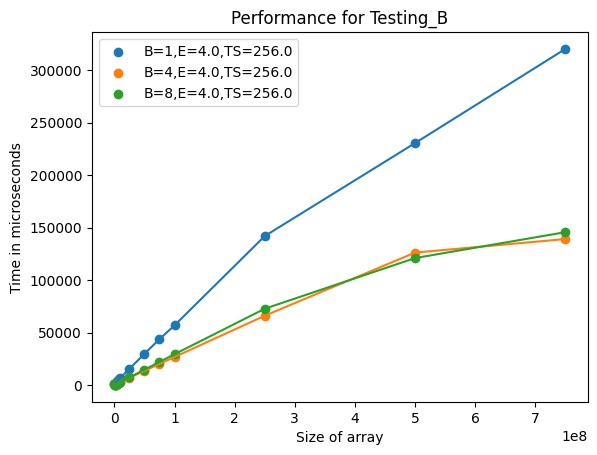

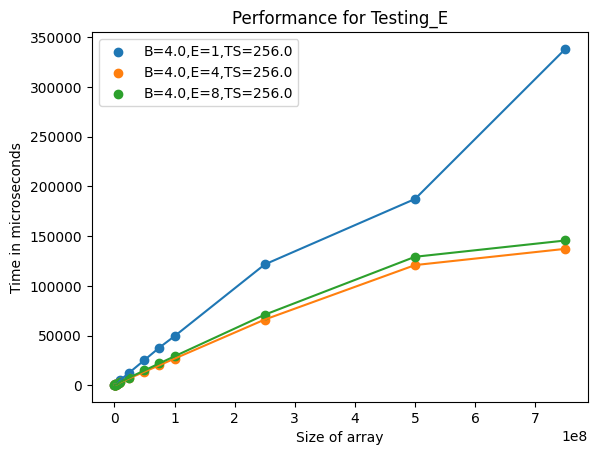

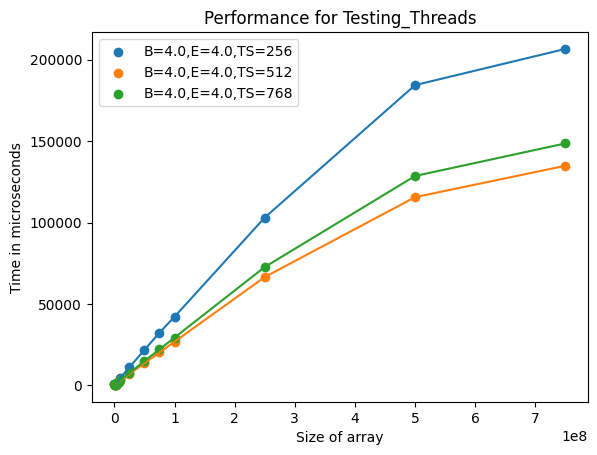

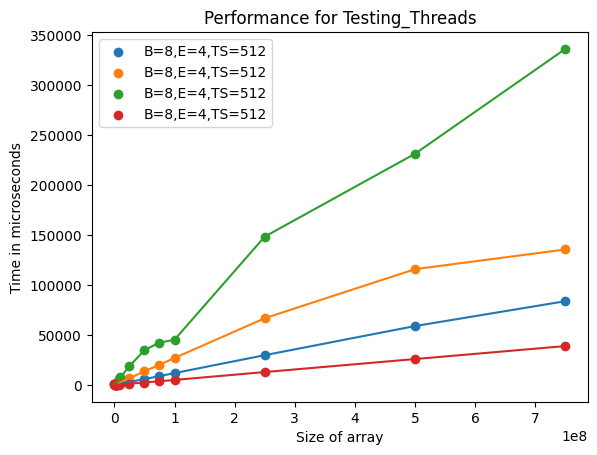

In [58]:
# Set the Bs, Es, or TSs array to the correct value before plotting
plots(data[0:3],"Testing_B", Bs=np.array([1,4,8]))
plots(data[3:6],"Testing_E", Es=np.array([1,4,8]))
plots(data[6:10],"Testing_Threads", TSs=np.array([256,512,768,1024]))
types = ["u8","u16","u32","u64"]
plots(data[10:],"Testing_Threads", Bs=np.array([8,8,8,8]), Es=np.array([4,4,4,4]), TSs=np.array([512,512,512,512]))

In [59]:
data[12]

array([[1.00000e+05, 2.50000e+05, 5.00000e+05, 7.50000e+05, 1.00000e+06,
        2.50000e+06, 5.00000e+06, 7.50000e+06, 1.00000e+07, 2.50000e+07,
        5.00000e+07, 7.50000e+07, 1.00000e+08, 2.50000e+08, 5.00000e+08,
        7.50000e+08],
       [7.93400e+02, 8.78700e+02, 1.47060e+03, 6.72900e+02, 6.44300e+02,
        1.39120e+03, 2.50550e+03, 5.52700e+03, 7.83880e+03, 1.88214e+04,
        3.49800e+04, 4.23762e+04, 4.52772e+04, 1.48378e+05, 2.31308e+05,
        3.36123e+05],
       [9.13700e+02, 8.41600e+02, 1.30430e+03, 4.34800e+02, 3.85200e+02,
        7.67700e+02, 1.50260e+03, 2.65840e+03, 3.43090e+03, 7.26220e+03,
        1.27298e+04, 1.59905e+04, 1.92374e+04, 4.74566e+04, 9.35338e+04,
        1.40772e+05]])